# Tree Models

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

from matplotlib import pyplot as plt

import import_ipynb
from Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb


In [2]:
hp_tree_fullyimputed = pd.read_csv('../hp_tree_fullyimputed.csv')

hp_tree_fullyimputed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,6,65.0,8450,2,0,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,2003
1,20,6,80.0,9600,2,0,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,1976
2,60,6,68.0,11250,2,0,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,2001
3,70,6,60.0,9550,2,0,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,1915
4,60,6,84.0,14260,2,0,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,62.0,7917,2,0,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,4,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,1999
1456,20,6,85.0,13175,2,0,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,5,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,1978
1457,70,6,66.0,9042,2,0,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,4,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,1941
1458,20,6,68.0,9717,2,0,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,4,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,1950


In [3]:
hp_logsaleprice = pd.read_csv('../hp_logsaleprice.csv')

hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


## Delete the outliers in the features and labels

In [4]:
hp_tree_fullyimputed_noOutliers = hp_tree_fullyimputed.drop([523, 825, 1298])

# hp_linear_fullyimputed_noOutliers = hp_linear_fullyimputed.drop([523, 825, 1298])

hp_logsaleprice_noOutliers = hp_logsaleprice.drop([523, 825, 1298])

# hp_linear_selected_noOutliers = hp_linear_selected.drop([523, 825, 1298])

# RANDOM FOREST

## Before Removing Outliers

# MUST USE CODE BEFORE REMOVING OUTLIERS

In [5]:
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_fullyimputed,
                                                   hp_logsaleprice, test_size=0.2, random_state=0)

ytrain = ytrain.values.flatten()

In [6]:
# import time
# t = time.localtime()
# current_time = time.strftime("%H:%M:%S", t)
# print(current_time)

# rfr = RandomForestRegressor()

# # learningrate = [0.01, 0.1, 0.5]

# maxdepth = [9, 30, 50, 80]
# # maxfeatures = [14]

# # minimpdec = [0.0022]
# minsamlf = [1, 5, 10]
# minsamsplt = [1, 5, 10]

# nestimators = [10, 100, 1000, 2500, 5000]
# oobscore = [True, False]

# warmstart = [True, False]

# gparam_rfr = {'max_depth': maxdepth,
#               'min_samples_leaf': minsamlf,
#               'min_samples_split': minsamsplt,
#               'n_estimators': nestimators,
#               'oob_score': oobscore,
#               'warm_start': warmstart
#              }

# n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

# gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
#                       scoring='neg_root_mean_squared_error', return_train_score=True)

# %time gs_rfr.fit(xtrain, ytrain)

# print('#'*50)
# print('\n')

# print('Currently, the best parameters are: ', gs_rfr.best_params_)

# print('#'*50)
# print('\n')

# print('The best score is: ', gs_rfr.best_estimator_.score(xtrain, ytrain))

# print('#'*50)
# print('\n')

# print('The RMSE is: ', rmse(gs_rfr, ytrain, xtrain))

# print('#'*50)
# print('\n')


# print('The test set RMSE is: ', rmse(gs_rfr, ytest, xtest))
# plt.figure(figsize=(20, 10))
# plt.scatter(gs_rfr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
# plt.scatter(gs_rfr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)

In [7]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_fullyimputed,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=randomstate)
ytrain = ytrain.values.flatten()

rfr = RandomForestRegressor()

n_folds = ms.KFold(n_splits=5, random_state=randomstate, shuffle=True)

maxdepth = [9, 30, 50, 80]

minsamlf = [1, 5, 10]
minsamsplt = [1, 5, 10]

nestimators = [10, 100, 1000, 2500, 5000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)


l_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))
best_par_list.append(gs_rfr.best_params_)


diff_rmse = np.subtract(train_rmse, test_rmse)
    
rfr_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

15:22:58


C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -0.15874072 -0.15651666 -0.15380188 -0.15329495
 -0.14859321 -0.14754706 -0.14840568 -0.1467615  -0.14699393 -0.14684134
 -0.14720047 -0.1467357  -0.14698595 -0.14676576 -0.14682167 -0.14691556
 -0.14684605 -0.14675094 -0.14668519 -0.14690998 -0.15692589 -0.15516243
 -0.15627146 -0.15656983 -0.14884203 -0.1484309  -0.15008282 -0.14832529
 -0.14775335 -0.14797236 -0.14805765 -0.14804592 -0.14793947 -0.14801466
 -0.14781736 -0.14773234 -0.14789043 -0.14791828 -0.14789342 -0.14797558
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan      

Wall time: 19min 47s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.977104,0.060802,0.135202,-0.0744,50,1,5,100,False,True


In [8]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_fullyimputed,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=randomstate)
ytrain = ytrain.values.flatten()

rfr = RandomForestRegressor()

n_folds = ms.KFold(n_splits=5, random_state=randomstate, shuffle=True)

maxdepth = [45, 50, 55]

minsamlf = [1, 2, 3]
minsamsplt = [4, 5, 6]

nestimators = [50, 100, 250, 400, 500]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)


l_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))
best_par_list.append(gs_rfr.best_params_)


diff_rmse = np.subtract(train_rmse, test_rmse)
    
rfr_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

15:42:45


KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

randomstate = 0

l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


    
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_fullyimputed,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=randomstate)
ytrain = ytrain.values.flatten()

rfr = RandomForestRegressor()

n_folds = ms.KFold(n_splits=5, random_state=randomstate, shuffle=True)

maxdepth = [43, 50, 53]

minsamlf = [1, 2, 3]
minsamsplt = [5]

nestimators = [100, 200, 250, 300]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)


l_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))
best_par_list.append(gs_rfr.best_params_)


diff_rmse = np.subtract(train_rmse, test_rmse)
    
rfr_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']

best_par_df = pd.DataFrame(best_par_list)

rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

In [ ]:
lowest_testrmse = rfr_res_df[rfr_res_df.TestRMSE==rfr_res_df.TestRMSE.min()]
lowest_testrmse

In [ ]:
lowest_testrmse = rfr_res_df[rfr_res_df.TestRMSE==rfr_res_df.TestRMSE.min()]

selected_random_state = lowest_testrmse.index[0]

low_col = list(lowest_testrmse.columns[4:])

low_param = list(map(lambda val:[val], lowest_testrmse.values.tolist()[0][4:]))

selected_params = dict(zip(low_col, low_param))

state = selected_random_state

xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_tree_fullyimputed,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

gparam_rfr = selected_params

gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                         scoring='neg_root_mean_squared_error', return_train_score=True)

gs_rfr.fit(xtrain, ytrain)

plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

22:59:44
Wall time: 1h 37min 13s
##################################################


Currently, the best parameters are:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'oob_score': False, 'warm_start': False}
##################################################


The best score is:  0.9782059492518156
##################################################


The RMSE is:  0.05852492386846009
##################################################


The test set RMSE is:  0.13620992562210796


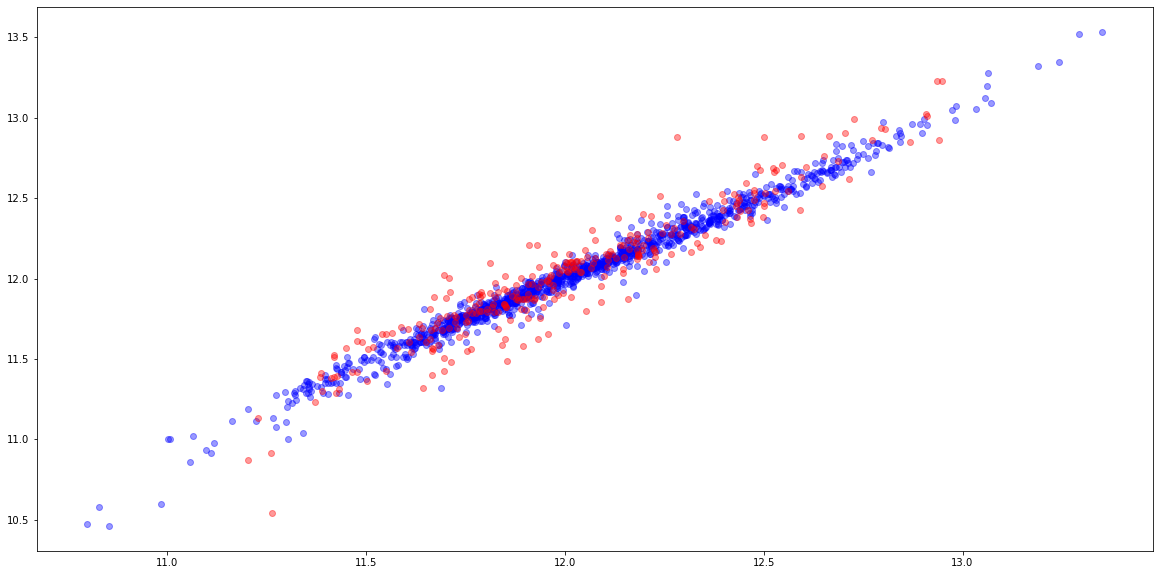

In [104]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [9, 30, 50, 80]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 5, 10]
minsamsplt = [1, 5, 10]

nestimators = [10, 100, 1000, 2500, 5000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

00:36:59
Wall time: 1h 33min
##################################################


Currently, the best parameters are:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 2000, 'oob_score': True, 'warm_start': False}
##################################################


The best score is:  0.9806954098335061
##################################################


The RMSE is:  0.05508104505262036
##################################################


The test set RMSE is:  0.1361866521394092


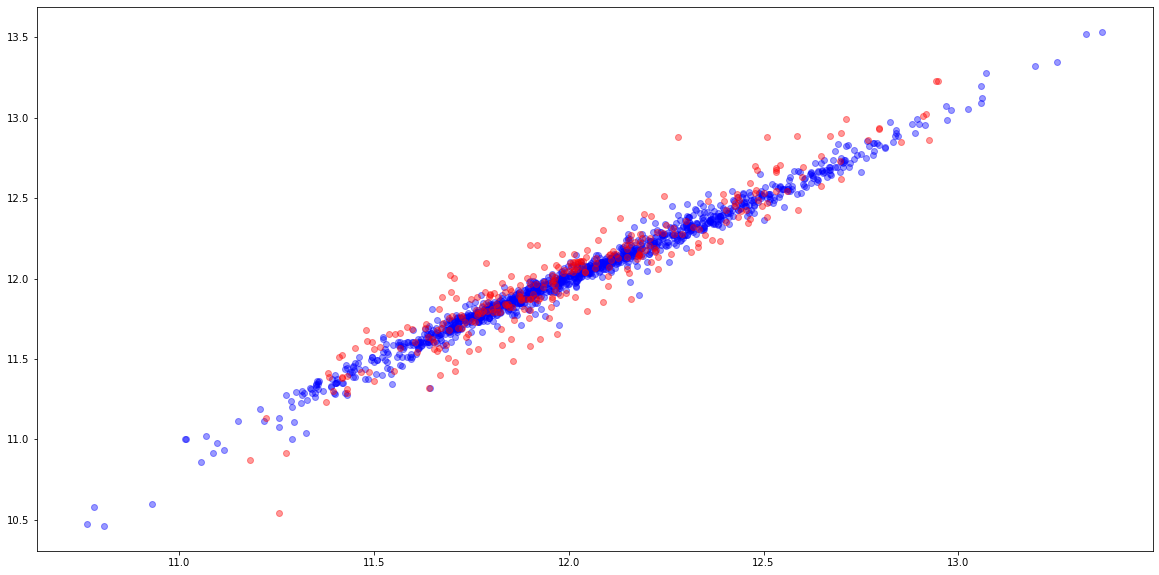

In [105]:
# {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2500, 'oob_score': False, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [20, 30, 40]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 2, 3]
minsamsplt = [4, 5, 6]

nestimators = [2000, 2500, 3000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

## After Deleting the outliers

In [ ]:
xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_fullyimputed_noOutliers, 
                                                               hp_logsaleprice_noOutliers, test_size=0.2, random_state=0)

ytrain_gb_out = ytrain_gb_out.values.flatten()

In [ ]:
# {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2500, 'oob_score': False, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [20, 30, 40]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 2, 3]
minsamsplt = [4, 5, 6]

nestimators = [2000, 2500, 3000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

## Gradient Boosting Regressions

In [94]:
xtrain_gb, xtest_gb, ytrain_gb, ytest_gb = ms.train_test_split(hp_tree_fullyimputed, 
                                                               hp_logsaleprice, test_size=0.2, random_state=0)

ytrain_gb = ytrain_gb.values.flatten()

### 1st Run

In [95]:
gbm = GradientBoostingRegressor()

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000, 5000]

maxfeatures = [9, 40, len(hp_tree_fullyimputed.columns)]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('where the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

##################################################


Currently, the best parameters are:  {'learning_rate': 0.0001, 'max_depth': 1, 'max_features': 9, 'n_estimators': 5}
where the learning rate is:  0.0001
and the number of estimators is:  5
where the max features are:  9
and the max depth is:  1
##################################################




ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

- We can see that there is a lot of overfitting compared to the test set


## Try tuning the model

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-2, n_iter_no_change=5, validation_fraction=0.2)

learningrate = [0.001, 0.01, 0.05]
nestimators = [2000, 3000, 4000, 5000, 6000]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.01, 0.1, 1]

maxfeatures = range(7, 12)
maxdepth = range(3, 6)

warmstart = [True, False]

minsamlf = [4, 6, 8, 10]
minsamsplt = [4, 6, 8, 10]
minimpdec = [0.01, 0.1, 1]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

# Adjust parameters of the model

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.04, 0.05, 0.06]
nestimators = [3750, 4000, 4250]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.8, 1, 1.2]

maxfeatures = range(8, 12)
maxdepth = range(4, 6)

warmstart = [True, False]

minsamlf = [7, 8, 9]
minsamsplt = [7, 8, 9]
minimpdec = [0.005, 0.01, 0.05]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

### Another tune

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=8, validation_fraction=0.2)

learningrate = [0.045, 0.05, 0.055]
nestimators = [3500, 3750, 4000]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.6, 0.8, 1]

maxfeatures = range(9, 13)
maxdepth = range(4, 6)

warmstart = [True, False]

minsamlf = [8, 9, 10]
minsamsplt = [6, 7, 8]
minimpdec = [0.007, 0.01, 0.03]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

- Overfitting is getting worse without catching test set

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.045, 0.05, 0.055]
nestimators = [3500, 3750, 4000]
# np.linspace(1500, 2500, 9, dtype='int32')
subsamp = [0.6, 0.8, 1]

maxfeatures = range(9, 13)
maxdepth = range(4, 6)

warmstart = [True, False]

minsamlf = [8, 9, 10]
minsamsplt = [6, 7, 8]
minimpdec = [0.007, 0.01, 0.03]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain_gb, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest_gb, color='red', alpha=0.4)

## Try Removing Outliers in the Data

In [ ]:
xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_fullyimputed_noOutliers, 
                                                               hp_logsaleprice_noOutliers, test_size=0.2, random_state=0)

ytrain_gb_out = ytrain_gb_out.values.flatten()

In [ ]:
gbm = GradientBoostingRegressor(loss='ls')

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000, 5000]

maxfeatures = [9, 40, len(hp_tree_fullyimputed.columns)]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the alpha is: ', gs_gbm.best_params_['learning_rate'])
print('and the L1 ratio is: ', gs_gbm.best_params_['n_estimators'])
print('where the alpha is: ', gs_gbm.best_params_['max_features'])
print('and the L1 ratio is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')

print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

# RUN THIS CELL

In [ ]:
# {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 9, 'n_estimators': 2000}

# {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 10, 'min_impurity_decrease': 0.01,
#  'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 4000, 'subsample': 1, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.005, 0.01, 0.05]
nestimators = [1950, 2000, 2050]

maxfeatures = range(7, 12)
maxdepth = range(2, 6)

warmstart = [True, False]

minsamlf = [9, 10, 11]
minsamsplt = [9, 10, 11]
minimpdec = [0.007, 0.01, 0.03]
subsamp = [0.6, 0.8, 1]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth,
              'warm_start': warmstart,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'min_impurity_decrease': minimpdec,
              'subsample': subsamp
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

### More Tuning

In [ ]:
# {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 11, 'min_impurity_decrease': 0.007,
#  'min_samples_leaf': 10, 'min_samples_split': 9, 'n_estimators': 2050, 'subsample': 0.6, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.003, 0.005, 0.007]

maxdepth = [4, 5, 6]
maxfeatures = [10, 11, 12]

minimpdec = [0.005, 0.007, 0.01]
minsamlf = [8, 9, 10]
minsamsplt = [8, 9, 10]

nestimators = [2000, 2050, 2100]
subsamp = [0.4, 0.6, 0.8]

warmstart = [True, False]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.007, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.005, 
#  'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 2100, 'subsample': 0.8, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.003, 0.005, 0.007]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.003, 0.005, 0.007]
minsamlf = [7, 8, 9]
minsamsplt = [9, 10, 11]

nestimators = [2050, 2100, 2150]
subsamp = [0.6, 0.8, 1.0]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.007, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.003, 0.005, 0.007]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.007, 'max_depth': 7, 'max_features': 12, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.006, 0.007, 0.008]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the learning rate is: ', gs_gbm.best_params_['learning_rate'])
print('and the number of estimators is: ', gs_gbm.best_params_['n_estimators'])
print('and the max features are: ', gs_gbm.best_params_['max_features'])
print('and the max depth is: ', gs_gbm.best_params_['max_depth'])
print('and warm start is: ', gs_gbm.best_params_['warm_start'])
print('and the min # of samples to split nodes are: ', gs_gbm.best_params_['min_samples_split'])
print('and the mnimum samples at a leaf node are: ', gs_gbm.best_params_['min_samples_leaf'])
print('and the minimum impurity decrease is: ', gs_gbm.best_params_['min_impurity_decrease'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.008, 'max_depth': 7, 'max_features': 11, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 11, 'min_samples_split': 7, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.01, 0.011, 0.012]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.012, 'max_depth': 6, 'max_features': 11, 'min_impurity_decrease': 0.0025,
#  'min_samples_leaf': 11, 'min_samples_split': 9, 'n_estimators': 2025, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.012, 0.13, 0.14]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.14, 'max_depth': 7, 'max_features': 11, 'min_impurity_decrease': 0.003,
#  'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 2075, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.14, 0.15, 0.16]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.145, 0.15, 0.155]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1525, 0.155, 0.1575]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.155, 0.1575, 0.159, 0.16]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.155, 0.1555, 0.156, 0.1565, 0.157, 0.1575]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.15729, 0.1573, 0.15731]

maxdepth = [5, 6, 7]
maxfeatures = [10, 11, 12]

minimpdec = [0.002, 0.0025, 0.003]
minsamlf = [9, 10, 11]
minsamsplt = [7, 8, 9]

nestimators = [2025, 2050, 2075]
subsamp = [1.0, 1.25, 1.5]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse( gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 12, 'min_impurity_decrease': 0.002,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2050, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [12, 13, 14]

minimpdec = [0.0018, 0.002, 0.0022]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2040, 2050, 2060]
subsamp = [0.09, 1.0, 1.1]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)
b
print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [11, 12, 13, 14, 15]

minimpdec = [0.00215, 0.0022, 0.00225]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2035, 2040, 2045]
subsamp = [0.095, 1.0, 1.05]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [11, 12, 13, 14, 15]

minimpdec = [0.00215, 0.00216, 0.00217, 0.00218, 0.00219, 0.0022, 0.00221]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2040, 2041, 2042, 2043, 2044, 2045]
subsamp = [0.095, 1.0, 1.05]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [14]

minimpdec = [0.0022]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2038, 2039, 2040, 2041]
subsamp = [0.095, 1.0, 1.05]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

# FINAL PARAMETERS FOR GBR

In [ ]:
# {'learning_rate': 0.1573, 'max_depth': 6, 'max_features': 14, 'min_impurity_decrease': 0.0022,
#  'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 2040, 'subsample': 1.0, 'warm_start': True}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

gbm = GradientBoostingRegressor(loss='ls', tol=1e-3, n_iter_no_change=10, validation_fraction=0.2)

learningrate = [0.1573]

maxdepth = [6]
maxfeatures = [14]

minimpdec = [0.0022]
minsamlf = [10]
minsamsplt = [8]

nestimators = [2039]
subsamp = [1.0]

warmstart = [True]

gparam_gbm = {'learning_rate': learningrate,
              'max_depth': maxdepth,
              'max_features': maxfeatures,
              'min_impurity_decrease': minimpdec,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'subsample': subsamp,         
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

# RANDOM FOREST

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [9, 30, 50, 80]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 5, 10]
minsamsplt = [1, 5, 10]

nestimators = [10, 100, 1000, 2500, 5000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
# {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2500, 'oob_score': False, 'warm_start': False}

import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

rfr = RandomForestRegressor()

# learningrate = [0.01, 0.1, 0.5]

maxdepth = [20, 30, 40]
# maxfeatures = [14]

# minimpdec = [0.0022]
minsamlf = [1, 2, 3]
minsamsplt = [4, 5, 6]

nestimators = [2000, 2500, 3000]
oobscore = [True, False]

warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart
             }

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_rfr = GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain_gb_out, ytrain_gb_out)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_rfr.best_params_)

print('#'*50)
print('\n')

print('The best score is: ', gs_rfr.best_estimator_.score(xtrain_gb_out, ytrain_gb_out))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_rfr, ytrain_gb_out, xtrain_gb_out))

print('#'*50)
print('\n')


print('The test set RMSE is: ', rmse(gs_rfr, ytest_gb_out, xtest_gb_out))
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain_gb_out), ytrain_gb_out, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest_gb_out), ytest_gb_out, color='red', alpha=0.4)

In [ ]:
xtrain_gb_out, xtest_gb_out, ytrain_gb_out, ytest_gb_out = ms.train_test_split(hp_tree_fullyimputed_noOutliers, 
                                                               hp_logsaleprice_noOutliers, test_size=0.2, random_state=0)

ytrain_gb_out = ytrain_gb_out.values.flatten()

In [ ]:
gbm = GradientBoostingRegressor(random_state=0,
                                loss='ls',
                                min_impurity_decrease=0.1,
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000, 5000]

maxfeatures = [9, 40, len(hp_tree_fullyimputed.columns)]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators,
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

print(gs_gbm.fit(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the alpha is: ', gs_gbm.best_params_['learning_rate'])
print('and the L1 ratio is: ', gs_gbm.best_params_['n_estimators'])
print('where the alpha is: ', gs_gbm.best_params_['max_features'])
print('and the L1 ratio is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

In [ ]:
print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)

In [ ]:
gbm = GradientBoostingRegressor(random_state=0)

learningrate = np.logspace(-3, -1, 20) 
nestimators = np.linspace(3000, 7000, 20)
maxfeatures = list(range(1, 20))
maxdepth = list(range(1, 5))

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

print(gs_gbm.fit(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_gbm.best_params_)

print('where the alpha is: ', gs_gbm.best_params_['learning_rate'])
print('and the L1 ratio is: ', gs_gbm.best_params_['n_estimators'])
print('where the alpha is: ', gs_gbm.best_params_['max_features'])
print('and the L1 ratio is: ', gs_gbm.best_params_['max_depth'])

print('#'*50)
print('\n')

print('The best score is: ', gs_gbm.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_gbm, ytrain_gb, xtrain_gb))

In [ ]:
print('The test set RMSE is: ', rmse(gs_gbm, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)

In [ ]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

## XGBoost

In [ ]:
xgb = XGBRegressor(random_state=0, eval_method='rmse', tree_method='gpu_hist')

In [ ]:
maxdepth = range(2, 6)
eta_ = np.linspace(1e-2, 1, 10)
gamma_ = np.linspace(1e-5, 100, 30)
subsample_ = np.linspace(0, 1, 3)
# updater_ = [grow_colmaker,prune,grow_gpu_hist]

n_folds=ms.KFold(n_splits=5, random_state=0, shuffle=True)

gparam_xgb = {'max_depth': maxdepth,
              'eta': eta_,
              'gamma': gamma_,
              'subsample': subsample_}

gs_xgb = GridSearchCV(xgb, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain_gb, ytrain_gb)

print('#'*50)
print('\n')

print('Currently, the best parameters are: ', gs_xgb.best_params_)

print('where the learning rate is: ', gs_xgb.best_params_['eta'])
print('and the L1 ratio is: ', gs_xgb.best_params_['max_depth'])
print('where the alpha is: ', gs_xgb.best_params_['gamma'])
print('and the L1 ratio is: ', gs_xgb.best_params_['subsample'])

print('#'*50)
print('\n')

print('The best score is: ', gs_xgb.best_estimator_.score(xtrain_gb, ytrain_gb))

print('#'*50)
print('\n')

print('The RMSE is: ', rmse(gs_xgb, ytrain_gb, xtrain_gb))

In [ ]:
gs_xgb.cv_results_

In [ ]:
print('The test set RMSE is: ', rmse(gs_xgb, ytest_gb, xtest_gb))

plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain_gb), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest_gb), ytest, color='red', alpha=0.4)